In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import skimage 
from skimage.transform import resize

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


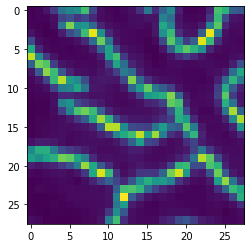

In [3]:
phlat_psf = skimage.io.imread('phlat_psf.png')
phlat_psf = phlat_psf[900:2900, 1500:3500, 1]
phlat_psf = resize(phlat_psf, (200, 200), anti_aliasing=True)
phlat_region = phlat_psf[10:38, 20:48]
phlat_region /= np.sum(phlat_region)
plt.imshow(phlat_region)

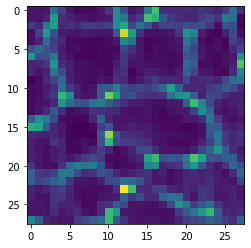

In [4]:
diffuser_psf = skimage.io.imread('diffuser_psf.png')
diffuser_psf = diffuser_psf[:,:,1]
diffuser_resize = diffuser_psf[200:500, 250:550]
diffuser_resize = resize(diffuser_resize, (100, 100), anti_aliasing=True)  #resize(diffuser_psf, (28, 28))
diffuser_region = diffuser_resize[:28, :28]
diffuser_region /=  np.sum(diffuser_region)
plt.imshow(diffuser_region)

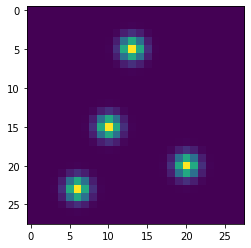

In [5]:
psf = np.zeros((28, 28))
psf[20,20] = 1
psf[15, 10] = 1
psf[5, 13] = 1
psf[23, 6] = 1
psf = scipy.ndimage.gaussian_filter(psf, sigma=1)
psf /= np.sum(psf)
plt.imshow(psf)

### TODO RML ONE LENSLET but smaller sigma 
Don't do airy disk, just a gentle small gaussian

### TODO do RML as well


For follow ups would need to do matched feature size. For here, it's fine to just do as it.

### TODO use henry's new code and run with that
Look at the documentation and get it to work.

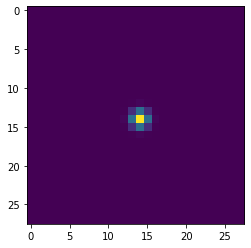

In [6]:
one_lens = np.zeros((28, 28))
one_lens[14, 14] = 1
one_lens = scipy.ndimage.gaussian_filter(one_lens, sigma=0.7)
plt.imshow(one_lens)

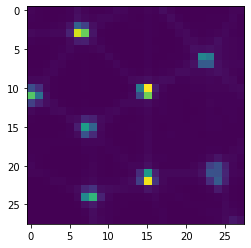

In [10]:
from leyla_fns import *
rml_psf = load_rml_psf()
plt.imshow(rml_psf)

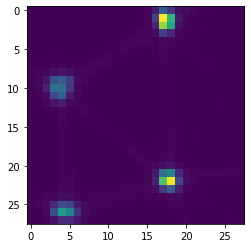

In [9]:
rml_psf = skimage.io.imread('psf_8holes.png')
rml_psf = rml_psf[1000:3000, 1500:3500]
rml_psf_small = resize(rml_psf, (85, 85), anti_aliasing=True)
rml_psf_region = rml_psf_small[52:80, 10:38]
rml_psf_region /= np.sum(rml_psf_region)
plt.figure()
plt.imshow(rml_psf_region)